Michael Ochs Project 2
    
Question for analysis:
- What variables affected the survival rate of Titanic passengers?

Variables to explore include but are not limited to:
- Gender
- Age: children survival vs. adults
- Fare paid
- Family Dynamics
    - Do children with parents present have a higher survival rate?
    - Do children with siblings present have a higher survival rate?
- Boarding Port

In [543]:
# survival        Survival
#                 (0 = No; 1 = Yes)
# pclass          Passenger Class
#                 (1 = 1st; 2 = 2nd; 3 = 3rd)
# name            Name
# sex             Sex
# age             Age
# sibsp           Number of Siblings/Spouses Aboard
# parch           Number of Parents/Children Aboard
# ticket          Ticket Number
# fare            Passenger Fare
# cabin           Cabin
# embarked        Port of Embarkation
#                 (C = Cherbourg; Q = Queenstown; S = Southampton)

In [544]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

filename = 'titanic_data.csv'
titanic_df = pd.read_csv(filename)

In [545]:
#Modify display option for pandas df to disable wrap text
pd.set_option('expand_frame_repr', False)
#Function for displaying all data in a data frame.  Used for troubleshooting.
def print_all(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [546]:
#Modify display option for graphs to allow in-notebook posts
%pylab inline
#Function is created to make bar charts to help explore what variables contribute to survival rate.
#Color consistency is kept throughout the report.  Males shown in blue.  Females are shown in green.
def make_bar_chart(data, xdata, ydata, huedat, xaxis, yaxis, order1, order2):
    if huedat == "Sex":
        bar_chart = sns.factorplot(x=xdata, y=ydata, hue="Sex", palette={"male": "#ADD9FE", "female": "#DDF9D9"}, data=data, size=6, order=np.arange(order1,order2), kind="bar")
    else:
        bar_chart = sns.factorplot(x=xdata, y=ydata, hue=huedat, data=data, size=6, order=np.arange(order1,order2), kind="bar", palette="muted")
    bar_chart.despine(left=True)
    bar_chart.set_xlabels(xaxis)
    bar_chart.set_ylabels(yaxis)

Populating the interactive namespace from numpy and matplotlib


In [547]:
#Function for generating survival statistics overall as well as based on class
def statistics_by_class(data, gender):
    total = 0
    survived = 0
    if gender == "all":
        for n in range(1,4):
            try:
                class_total = int(data.groupby("Pclass").count()["Survived"][n])
                total += class_total
            except LookupError:
                class_total = 0
                        
            try:
                class_survived = int(data.groupby("Pclass").sum()["Survived"][n])
                survived += class_survived
            except LookupError:
                class_survived = 0
            
            try:
                class_survival_rate = float(class_survived) / float(class_total)
            except ZeroDivisionError:
                class_survival_rate = "NaN"
            
            if class_total == 0:
                print "Class", str(n), "Total: 0, Survived:", class_survived, "Survival Rate: NaN"
            else:
                class_survival_rate = float(class_survived) / float(class_total)
                print "Class", str(n), "Total:", class_total,", Survived:", class_survived, "Survival Rate:", round(class_survival_rate, 4)
    else:
        for n in range(1,4):
            try:
                class_total = int(data[data.Sex == gender].groupby("Pclass").count()["Survived"][n])
                total += class_total
            except LookupError:
                class_total = 0
            
            try:
                class_survived = int(data[data.Sex == gender].groupby("Pclass").sum()["Survived"][n])
                survived += class_survived
            except LookupError:
                class_survived = 0
            
            if class_total == 0:
                print "Class", str(n), "Total: 0, Survived:", class_survived, "Survival Rate: NaN"
            else:
                class_survival_rate = float(class_survived) / float(class_total)
                print "Class", str(n), "Total:", class_total,", Survived:", class_survived, "Survival Rate:", round(class_survival_rate, 4)
                
    survival_rate = float(survived) / float(total)
    print "Total:", total,", Survived:", survived, "Survival Rate:", round(survival_rate, 4)
    
def full_stats(data, title):
    print title,"Passengers by Class"
    statistics_by_class(data, "all")
    print ""
    print title,"Male Passengers by Class"
    statistics_by_class(data, "male")
    print ""
    print title,"Female Passengers by Class"
    statistics_by_class(data, "female")

All Passengers by Class
Class 1 Total: 216 , Survived: 136 Survival Rate: 0.6296
Class 2 Total: 184 , Survived: 87 Survival Rate: 0.4728
Class 3 Total: 491 , Survived: 119 Survival Rate: 0.2424
Total: 891 , Survived: 342 Survival Rate: 0.3838

All Male Passengers by Class
Class 1 Total: 122 , Survived: 45 Survival Rate: 0.3689
Class 2 Total: 108 , Survived: 17 Survival Rate: 0.1574
Class 3 Total: 347 , Survived: 47 Survival Rate: 0.1354
Total: 577 , Survived: 109 Survival Rate: 0.1889

All Female Passengers by Class
Class 1 Total: 94 , Survived: 91 Survival Rate: 0.9681
Class 2 Total: 76 , Survived: 70 Survival Rate: 0.9211
Class 3 Total: 144 , Survived: 72 Survival Rate: 0.5
Total: 314 , Survived: 233 Survival Rate: 0.742


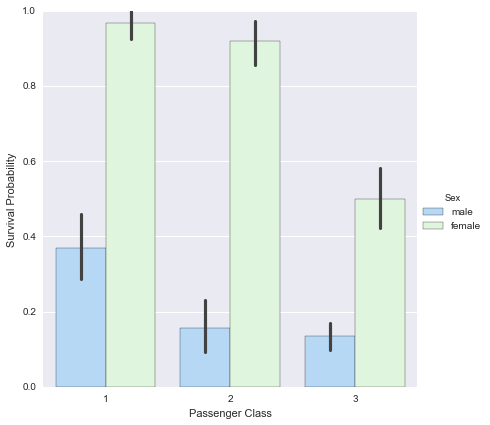

In [548]:
full_stats(titanic_df, "All")
make_bar_chart(titanic_df, "Pclass", "Survived", "Sex", "Passenger Class", "Survival Probability", 1, 4)

Females in first and second class had a high percentage of survival.  The factors that may have been invloved in the dramatic decrease of third class females will be investigated.

It's important to note that men have a significantly lower surivival rate compared to females.  Males across all seating classes had very low survival rates.  Survival rates of males in second and third class were roughly half that of first class males.  The survival rate of all males will be investigated since all survival rates are low.

In [549]:
all_males_df = titanic_df[titanic_df.Sex == "male"].copy()
all_females_df = titanic_df[titanic_df.Sex == "female"].copy()

#Not all passengers have ages.  Thus, those with NaN for Age are removed for the following 2 data frames
all_males_with_age_df = all_males_df[all_males_df.Age >= 0].copy()
all_females_with_age_df = all_females_df[all_females_df.Age >= 0].copy()

print all_males_with_age_df.describe()["Age"]
print ""
print all_females_with_age_df.describe()["Age"]

count    453.000000
mean      30.726645
std       14.678201
min        0.420000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

count    261.000000
mean      27.915709
std       14.110146
min        0.750000
25%       18.000000
50%       27.000000
75%       37.000000
max       63.000000
Name: Age, dtype: float64


Notes on gender-based age statistics:
- Average age of males was 30.7
- Average age of females was 27.9
- There were substantially more males than females
- There was a wider age range of males than females

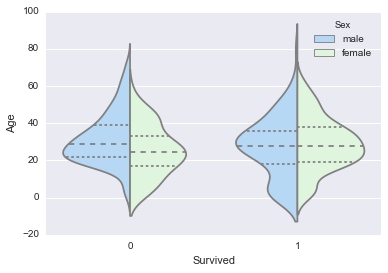

In [550]:
survival_by_age = sns.violinplot(x="Survived", y="Age", hue="Sex", palette={"male": "#ADD9FE", "female": "#DDF9D9"}, data=titanic_df[titanic_df.Age >= 0], size=10, split=True, inner="quart")

Graphs of ages of those who survived.  Distributions look similar for male and female.  Also the ages of the males and females who survived or did not are similar.  Thus, it's not clear age played a role in the survival rate.  A small bump for young males and young females who survived can be seen.  Thus, we should dive into the survival rates of children and the factors that may have alterted their survival rate.  I will investigate many factors that may have lead to survival.  Some factors include age, boarding port, gender, family dynamics (parents or siblings), etc.

All Adult Passengers by Class
Class 1 Total: 174 , Survived: 111 Survival Rate: 0.6379
Class 2 Total: 150 , Survived: 62 Survival Rate: 0.4133
Class 3 Total: 277 , Survived: 56 Survival Rate: 0.2022
Total: 601 , Survived: 229 Survival Rate: 0.381

All Adult Male Passengers by Class
Class 1 Total: 97 , Survived: 36 Survival Rate: 0.3711
Class 2 Total: 88 , Survived: 6 Survival Rate: 0.0682
Class 3 Total: 210 , Survived: 28 Survival Rate: 0.1333
Total: 395 , Survived: 70 Survival Rate: 0.1772

All Adult Female Passengers by Class
Class 1 Total: 77 , Survived: 75 Survival Rate: 0.974
Class 2 Total: 62 , Survived: 56 Survival Rate: 0.9032
Class 3 Total: 67 , Survived: 28 Survival Rate: 0.4179
Total: 206 , Survived: 159 Survival Rate: 0.7718


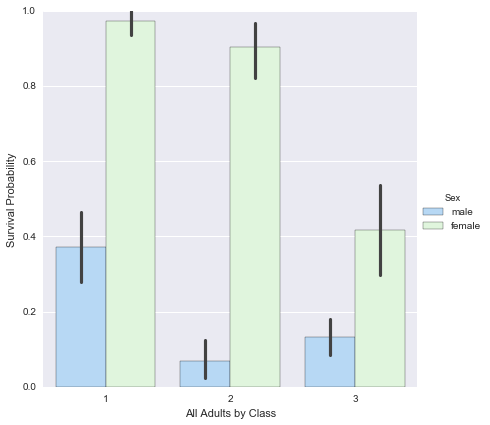

In [551]:
all_adults = titanic_df[titanic_df.Age >= 18].copy()
full_stats(all_adults, "All Adult")
make_bar_chart(all_adults, "Pclass", "Survived", "Sex", "All Adults by Class", "Survival Probability", 1, 4)

The statistics above show that adult female survival rates are much higher than adultmales'.  Adult females in third class were had the lowest survival rate; however, the percentage was still higher than adult males in first class--the highest survival rate class for adult males.  It is important to note that there were almost 3x the number of adult males in first class than adult females in third class.

Adult females overall made up 33.9% of total adults and had a 77.2% survival rate.  That made a significant increase to the overall adult survival rate being 38.1%.  Adult males--who made up 65.7% of total adults--had a 17.7% survival rate.

In [552]:
#Function returns the average fare for a specific class
def fare_average(data, pclass):
    return data[data.Pclass == pclass].mean()["Fare"]
class_1_adult_avg = fare_average(all_adults, 1)
class_2_adult_avg = fare_average(all_adults, 2)
class_3_adult_avg = fare_average(all_adults, 3)
print "First:", class_1_adult_avg, "\nSecond:", class_2_adult_avg, "\nThird:", class_3_adult_avg

First: 86.5741149425 
Second: 20.7828333333 
Third: 11.0563602888


I wanted to investigate wether there was a correlation between fare prices and survival rating.  The above is a simple calculation of the average fares for each class.  Next, we'll graph the survival rates of the top half and bottom half of fare prices.

All 50th Fare Percentile Passengers by Class
Class 1 Total: 50 , Survived: 38 Survival Rate: 0.76
Class 2 Total: 63 , Survived: 29 Survival Rate: 0.4603
Class 3 Total: 62 , Survived: 17 Survival Rate: 0.2742
Total: 175 , Survived: 84 Survival Rate: 0.48

All 50th Fare Percentile Male Passengers by Class
Class 1 Total: 18 , Survived: 7 Survival Rate: 0.3889
Class 2 Total: 32 , Survived: 1 Survival Rate: 0.0313
Class 3 Total: 31 , Survived: 5 Survival Rate: 0.1613
Total: 81 , Survived: 13 Survival Rate: 0.1605

All 50th Fare Percentile Female Passengers by Class
Class 1 Total: 32 , Survived: 31 Survival Rate: 0.9688
Class 2 Total: 31 , Survived: 28 Survival Rate: 0.9032
Class 3 Total: 31 , Survived: 12 Survival Rate: 0.3871
Total: 94 , Survived: 71 Survival Rate: 0.7553


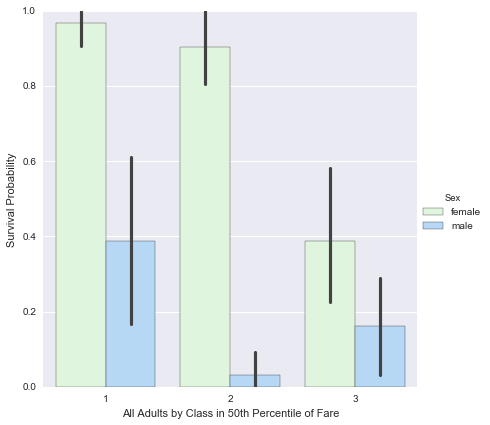

In [553]:
#Function creates a list of all passengers that paid above the average price for each class
def fare_comparison(data):
    fare_average(data, 1)
    new_data = data[data.PassengerId < 0].copy()
    n = 0
    for i in range(len(data)):
        fare_i = float(data.iloc[i]["Fare"])
        fare_fiftith = float(fare_average(data, data.iloc[i]["Pclass"]))
        if fare_i > fare_fiftith:
            new_data.loc[n] = data.iloc[i].copy()
            n += 1
    return new_data

#Analysis of passengers who paid more than the average fare for their respective class
all_adults_upper_50 = fare_comparison(all_adults)
full_stats(all_adults_upper_50, "All 50th Fare Percentile")
make_bar_chart(all_adults_upper_50, "Pclass", "Survived", "Sex", "All Adults by Class in 50th Percentile of Fare", "Survival Probability", 1, 4)

There does not appear to be any differneces between passengers in the upper 50th percentile of fares vs. passengers in the lower 50th.  Both males and females have similar profiles for survival rate in the 3 classes.  This suggests that there was no correlation between fare price and survival rate by class.

All Children Passengers by Class
Class 1 Total: 12 , Survived: 11 Survival Rate: 0.9167
Class 2 Total: 23 , Survived: 21 Survival Rate: 0.913
Class 3 Total: 78 , Survived: 29 Survival Rate: 0.3718
Total: 113 , Survived: 61 Survival Rate: 0.5398

All Children Male Passengers by Class
Class 1 Total: 4 , Survived: 4 Survival Rate: 1.0
Class 2 Total: 11 , Survived: 9 Survival Rate: 0.8182
Class 3 Total: 43 , Survived: 10 Survival Rate: 0.2326
Total: 58 , Survived: 23 Survival Rate: 0.3966

All Children Female Passengers by Class
Class 1 Total: 8 , Survived: 7 Survival Rate: 0.875
Class 2 Total: 12 , Survived: 12 Survival Rate: 1.0
Class 3 Total: 35 , Survived: 19 Survival Rate: 0.5429
Total: 55 , Survived: 38 Survival Rate: 0.6909


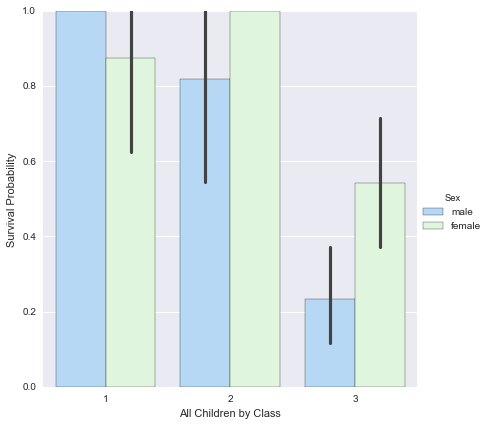

In [554]:
#Data frames for children are created.  Any NaN age passengers will be filtered out.
all_children = titanic_df[titanic_df.Age < 18].copy()
full_stats(all_children, "All Children")
make_bar_chart(all_children, "Pclass", "Survived", "Sex", "All Children by Class", "Survival Probability", 1, 4)

Male children have good survival rates for first and second class when compared to female children rate.  Third class male children are exceptionally low.  Less than a third of third class male children survived.

Female children survival rates are very high.  Almost all female children in first and second class survived.  More than half of female children in third class survived.

These statistic suggest a correlation between survival rate of children and class; however, it is important to note that the total number of children is very low.  There were 891 passengers on the Titanic and only 113--or 12.7%--were children.  Furthermore, there were 69% of children in third class.  This would make it difficult to draw many conclusions and correlations without a more even distribution.

All Children-with-Parents Passengers by Class
Class 1 Total: 9 , Survived: 8 Survival Rate: 0.8889
Class 2 Total: 18 , Survived: 18 Survival Rate: 1.0
Class 3 Total: 54 , Survived: 19 Survival Rate: 0.3519
Total: 81 , Survived: 45 Survival Rate: 0.5556

All Children-with-Parents Male Passengers by Class
Class 1 Total: 4 , Survived: 4 Survival Rate: 1.0
Class 2 Total: 9 , Survived: 9 Survival Rate: 1.0
Class 3 Total: 30 , Survived: 8 Survival Rate: 0.2667
Total: 43 , Survived: 21 Survival Rate: 0.4884

All Children-with-Parents Female Passengers by Class
Class 1 Total: 5 , Survived: 4 Survival Rate: 0.8
Class 2 Total: 9 , Survived: 9 Survival Rate: 1.0
Class 3 Total: 24 , Survived: 11 Survival Rate: 0.4583
Total: 38 , Survived: 24 Survival Rate: 0.6316


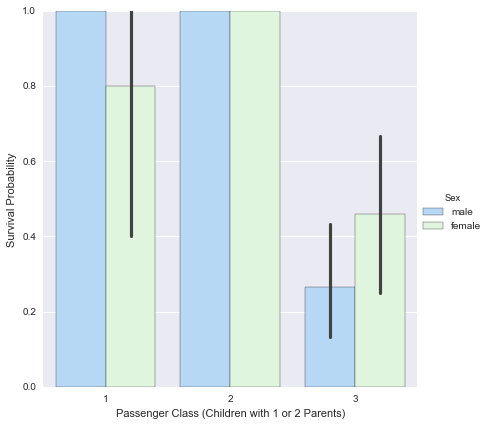

In [555]:
all_children_with_parents = all_children[all_children.Parch > 0].copy()
full_stats(all_children_with_parents,"All Children-with-Parents")
make_bar_chart(all_children_with_parents, "Pclass", "Survived", "Sex", "Passenger Class (Children with 1 or 2 Parents)", "Survival Probability", 1, 4)

Almost all children with parents in first and second class survived.  Unfortunately only roughly a third of third class children with parents survived.

All Children-without-Parents Passengers by Class
Class 1 Total: 3 , Survived: 3 Survival Rate: 1.0
Class 2 Total: 5 , Survived: 3 Survival Rate: 0.6
Class 3 Total: 24 , Survived: 10 Survival Rate: 0.4167
Total: 32 , Survived: 16 Survival Rate: 0.5

All Children-without-Parents Male Passengers by Class
Class 1 Total: 0, Survived: 0 Survival Rate: NaN
Class 2 Total: 2 , Survived: 0 Survival Rate: 0.0
Class 3 Total: 13 , Survived: 2 Survival Rate: 0.1538
Total: 15 , Survived: 2 Survival Rate: 0.1333

All Children-without-Parents Female Passengers by Class
Class 1 Total: 3 , Survived: 3 Survival Rate: 1.0
Class 2 Total: 3 , Survived: 3 Survival Rate: 1.0
Class 3 Total: 11 , Survived: 8 Survival Rate: 0.7273
Total: 17 , Survived: 14 Survival Rate: 0.8235


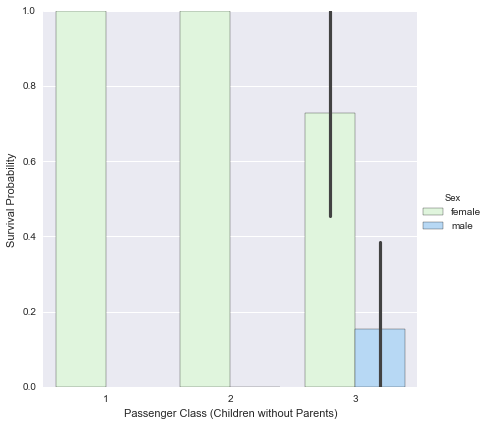

In [556]:
all_children_without_parents = all_children[all_children.Parch == 0].copy()
full_stats(all_children_without_parents,"All Children-without-Parents")
make_bar_chart(all_children_without_parents, "Pclass", "Survived", "Sex", "Passenger Class (Children without Parents)", "Survival Probability", 1, 4)

**What We Can Gather from Graphs**

The survival rate of male children is strong correlated to whether their parents were present.  Males with parents had a very
high survival rate if their parents were present in first and second class.  

Almost all female children survived.  Surprisingly, third class female children without parents had a higher rate
of survival than female children with parents.

**What We Can Gather From Data**

The number of child passengers without parents present was 17 children or 1.9% of total passengers.  Thus, this sample size is insignificant in comparison.

** Notes on Overall Survival Rates of Children  **

All children survival rates are highly correlated to the class in which they resided.  All child samples showed a significant decline in survival rate when housed in third class.

SibSp
False    210
True     132
Name: Survived, dtype: int64


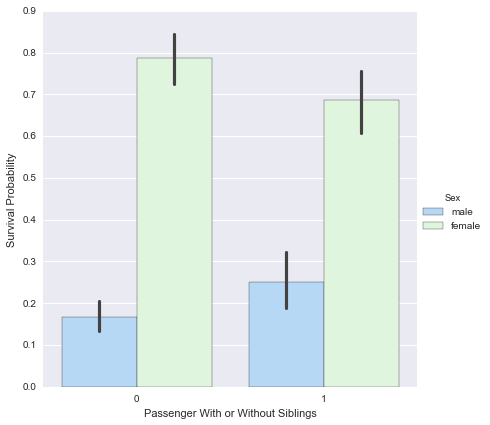

In [557]:
all_passengers_without_siblings = titanic_df.drop(titanic_df[titanic_df.SibSp > 0].index)
all_passengers_with_siblings = titanic_df.drop(titanic_df[titanic_df.SibSp == 0].index)

sibling_bool = titanic_df.copy()
sibling_bool["SibSp"] = sibling_bool["SibSp"].astype('bool')

make_bar_chart(sibling_bool, "SibSp", "Survived", "Sex", "Passenger With or Without Siblings", "Survival Probability", 0, 2)
print sibling_bool.groupby("SibSp").sum()["Survived"]

Having siblings did not appear to have any significant change in survival rate.  Males slightly decline if they did not have
siblings present.  Females slightly increased.

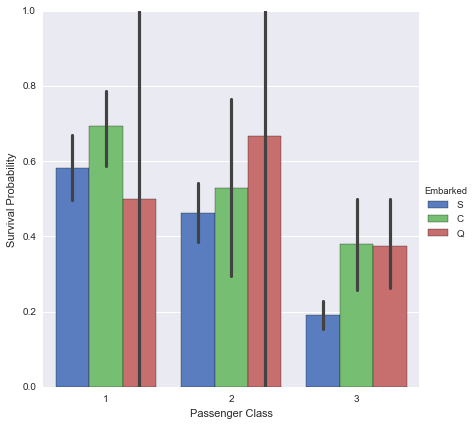

In [558]:
make_bar_chart(titanic_df, "Pclass", "Survived", "Embarked", "Passenger Class", "Survival Probability", 1, 4)

Survival rate did not appear to be correlated to the passengers' port of embarkation.  First class had an overall higher survival rate.  Second class had slightly lower survival rates.  Third class had low survival rates.  This data falls in line with previous analyses.

On an individual basis, it is interesting to note that passengers that deported from Queenstown had a non-uniform survival rate.  Meaning, we would expect first class to have the highest survival rates, middle be second class, and lowest be third class; however, the second class survival rate was the highest.

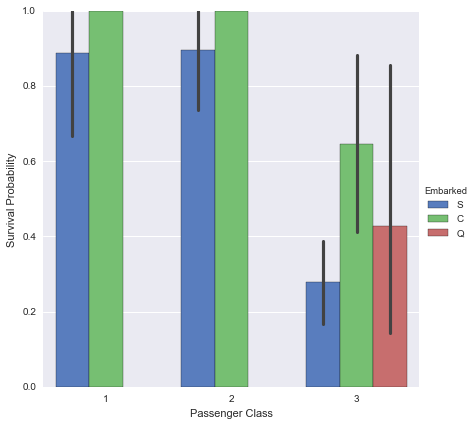

In [559]:
make_bar_chart(all_children, "Pclass", "Survived", "Embarked", "Passenger Class", "Survival Probability", 1, 4)

The port of embarkation is investigated for children.  Children survival was even more closely related to class.  No correlation can be seen with port of embarkation.

** Conclusion **

We can tell from the data above that class and gender greatly influenced the survival rate.  Males in third class had the lowest chance of survival.  Females in first class had the highest chance of survival.

Map of Titanic: http://www.encyclopedia-titanica.org/files/1/figure-one-side-view.gif
Looking at a map of the titanic may provide some reasoning for class being so dependant.  Here are some possibilities:

- We can see third class was at the far front and far rear of the boat.  The ice berg first hit the front side of the Titanic right where the front section of third class was.
- The stairs in the front section were sectioned in two parts.  In other words it wasn't a continous leveling of stairs to the deck of the ship.  This extra movement may have caused confusion, delays, and congestion when transitioning to the final stairs to the deck.
- The front section of third class was the first to be submerged.  Here's a video that illustrates the sinking: https://www.youtube.com/watch?v=c5cFoRLeVZw
- First class had the best and closest access to the deck.  First class had access to 3 stair wells.  Also, the occupation density of first class was in and around the deck level.
